In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [40]:
dataset = pd.read_csv('/content/gld_price_data.csv')

In [41]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [42]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [43]:
dataset.shape

(2290, 6)

In [44]:
correlation = dataset.select_dtypes(include='number').corr()


<Axes: >

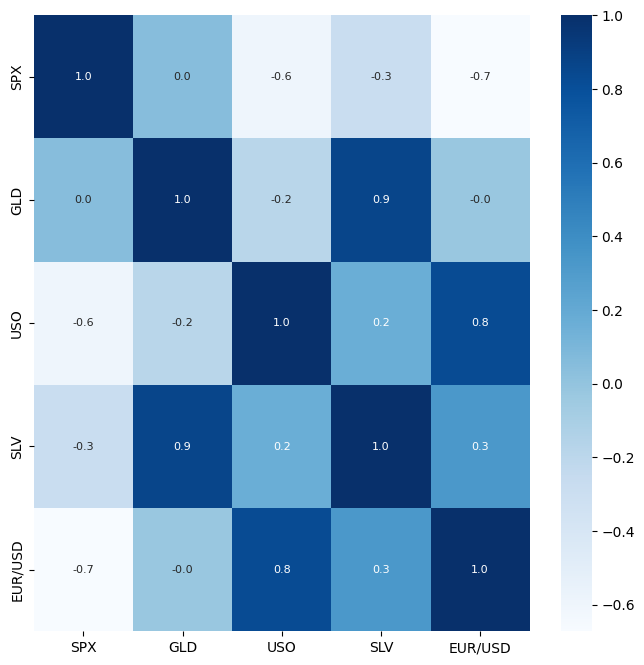

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar =True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [46]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-47-1814194158.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

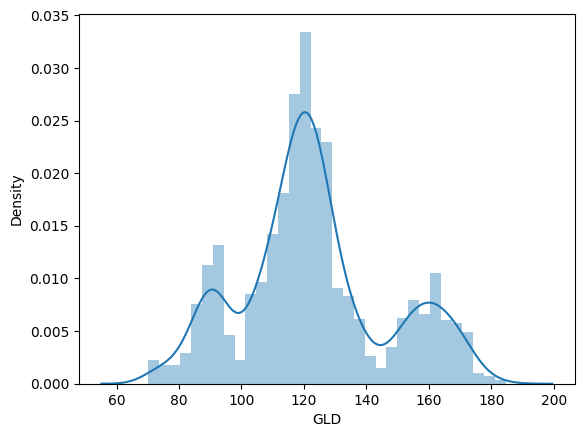

In [47]:
sns.distplot(dataset['GLD'])

In [48]:
x = dataset.drop(['Date','GLD'],axis=1)
y = dataset['GLD']

In [49]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [50]:
print(y.value_counts())


GLD
115.940002    5
126.300003    4
122.209999    4
124.589996    4
117.959999    4
             ..
125.000000    1
125.129997    1
90.080002     1
87.889999     1
88.169998     1
Name: count, Length: 1930, dtype: int64


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
model = RandomForestRegressor(n_estimators=100)

In [58]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [63]:
x_train_prediction = model.predict(x_test)

In [65]:
err = r2_score(y_test,x_train_prediction)
print(err)

0.9896420955649998


In [67]:
y_test = list(y_test)

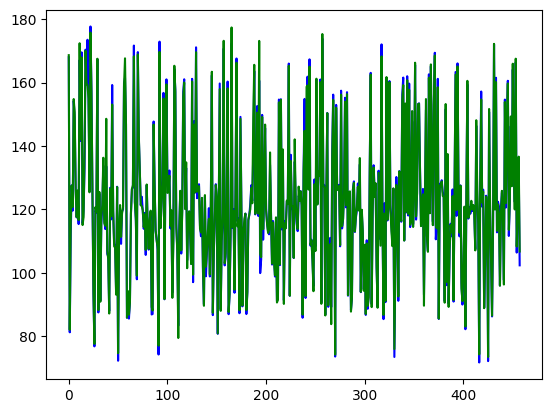

In [68]:
plt.plot(y_test,color='blue',label='Actual Value')
plt.plot(x_train_prediction,color='green',label='Predicted Value')

In [69]:
new_data = x_test.iloc[[2]]
aa = model.predict(new_data)
print(aa)

[116.10680039]
